[Α.Στοιχεία Ομάδας](#Στοιχεία) 

[Β.Εισαγωγή του Dataset](#Εισαγωγή)

[Γ.Baseline Classification](#Baseline)

[Δ.Βελτίωση Ταξινομητών](#Βελτίωση)

[Ε.Τελική Αρχιτεκτονική Μετασχηματισμών](#Final)

<a id='Στοιχεία'></a>

## Στοιχεία Ομάδας

Αριθμός Ομάδας: Μ.Α.11

    > Καρυπιάδης Ευστράτιος: 03114911 

In [6]:
import warnings
warnings.filterwarnings('ignore')

Η ανάπτυξη του Notebook πραγματοποιήθηκε σε τοπικό περιβάλλον. Κατά συνέπεια ο πίνακας περιεχομένων που παρουσιάζεται παραπάνω, αλλά και εκείνος του Δ. κεφαλαίου ενδέχεται να μην διατηρούν τη λειτουργικότητά τους σε διαφορετικά περιβάλλοντα. Επίσης, εντολές μορφοποίησης κειμένου ενδέχεται επίσης να μεταβάλλουν τη συμπεριφορά τους.

---

<a id='Εισαγωγή'></a>

## Εισαγωγή του Dataset

Το σύνολο των δεδομένων μας συλλέχθηκε με τη χρήση τηλεσκοπίων *MAGIC(Major Atmospheric Gamma Imaging Cherenkov Telescopes)*. Πιο συγκεκριμένα, τα τηλεσκόπια αυτά εκμεταλλεύονται τη ραδιενέργεια *Cherenkov* που απελευθερώνεται από επιταχυνόμενα σωματίδια και συλλέγει αντίστοιχους παλμούς ραδιενέργειας, οι οποίοι προέρχονται από τη σκέδαση σωματιδίων, είτε λόγω ακτινών γάμμα, είτε λόγω ηλιακής ακτινοβολίας. Οι εικόνες που ελήφθησαν, επεξεργάστηκαν στη συνέχεια από το πρόγραμμα *Corsika*, ώστε να εξαχθούν οι αντίστοιχες μετρικές ψηφιακής περιγραφής αυτών. Τα δείγματα που έχουμε στη διάθεσή μας θα επιχειρήσουμε να τα ταξινομήσουμε σε δύο κατηγορίες, ανάλογα με το αν τα σωματίδια σκέδασης προέρχοναι από ακτινοβολία γάμμα ή από ηλιακή ακτινοβολία.

Τα δεδομένα μας περιέχονται σε ένα αρχείο .data, το οποίο θα το διαβάσουμε σε ένα DataFrame. Δεν υπάρχουν επικεφαλίδες για τα χαρακτηριστικά μας, τα οποία θα ονοματίσουμε χειροκίνητα συμβουλευόμενοι την περιγραφή των δεδομένων μας. Επίσης, δεν υπάρχει αρίθμηση για τα δείγματά μας.

In [10]:
import pandas as pd

column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'label']

pulses = pd.read_csv('data/magic04.data', names=column_names, header=None, sep=',')
pulses.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


Στη συνέχεια θα εξάγουμε χρήσιμες πληροφορίες για τα δεδομένα μας:

In [2]:
pulses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConc1      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
label       19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [3]:
pulses.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [4]:
pulses.shape

(19020, 11)

Παρατηρούμε ότι έχουμε στη διάθεσή μας 19020 δείγματα, κάθε ένα από τα οποία προσδιορίζεται από 10 χαρακτηριστικά. Τα χαρακτηριστικά αυτά βρίσκονται όλα σε αριθμητική μορφή, ενώ δεν έχουμε απουσιάζουσες τιμές για κανένα από αυτά. Η τελευταία στήλη των δεδομένων μας αντιστοιχεί στην ετικέτα της κατηγορίας, στην οποία ανήκει κάθε αντίστοιχο δείγμα. Σημειώνουμε ότι οι ετικέτες μας είναι σε μορφή κειμένου, γεγονός το οποίο δε χρήζει απαραίτητη την αριθμητική τους κωδικοποίηση δεδομένου ότι είναι διαφορετικές μεταξύ τους.

In [5]:
pulses['label'].value_counts(normalize=True) * 100

g    64.837014
h    35.162986
Name: label, dtype: float64

Οι κατηγορίες των παλμών είναι 2 και φέρουν τις ετικέτες *g(gamma)* και *h(hadron)*. Παρατηρούμε επίσης ότι τα 2/3 περίπου των δεδομένων μας αντιστοιχούν σε δείγματα της κατηγορίας g και αντίστοιχα το 1/3 αυτών στην κατηγορία h, καθιστώντας το dataset μας μη-ισορροπημένο. Το γεγονός αυτό θα πρέπει να το λάβουμε υπόψην, προτού προχωρήσουμε στην εκπαίδευση των ταξινομητών μας.

---

## Διαχωρισμός Δεδομένων Εκπαίδευσης & Ελέγχου

Αρχικά θα διαχωρίσουμε τα δεδομένα σε εκπαίδευσης και ελέγχου χρησιμοποιώντας τη συνάρτηση *ShuffleSplit*. Θα ακολουθήσουμε ποσοστό δεδομένων ελέγχου 30%:

In [11]:
import numpy as np
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits = 1, test_size = 0.3)
for train_index, test_index in split.split(pulses, pulses['label']):
    train_set = pulses.reindex(train_index)
    test_set = pulses.reindex(test_index)
    
train_set['label'].value_counts() / len(train_set) * 100

g    65.111912
h    34.888088
Name: label, dtype: float64

Παρατηρούμε ότι η ανισορροπία του dataset αποτυπώνεται και στα διαχωρισμένα σύνολα που δημιουργήσαμε. Δεδομένου ότι έχουμε ένα πλήθος 19020 δειγμάτων θα ακολουθήσουμε την τεχνική του *Undersampling* ώστε να μειώσουμε το χρόνο εκπαίδευσης των μοντέλων ταξινομητών. Η τεχνική αυτή θα εφαρμοστεί αποκλειστικά στα δεδομένα εκπαίδευσης. Σημειώνουμε ότι προφανώς ελλοχεύει ο κίνδυνος ξεσκαρταρίσματος χρήσιμης πληροφορίας.

Προτού προχωρήσουμε θα διαχωρίσουμε τα δεδομένα μας από την ετικέτα της κατηγορίας στην οποία ανήκουν:

In [12]:
# Training Set
pulses_train = train_set.drop('label', axis=1)
pulses_train_labels = train_set['label'].copy()

# Test Set
pulses_test = test_set.drop('label', axis=1)
pulses_test_labels = test_set['label'].copy()

In [13]:
pulses_train.shape

(13314, 10)

Συνεχίζουμε με τον *RandomUnderSampler*:

In [14]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
pulses_train, pulses_train_labels = rus.fit_resample(pulses_train, pulses_train_labels)

In [15]:
pulses_train.shape

(9290, 10)

In [16]:
Counter(pulses_train_labels)

Counter({'g': 4645, 'h': 4645})

Με την παραπάνω διαδικασία χάσαμε περίπου 4000 δείγματα, αλλά εξισορροπήσαμε τα δεδομένα εκπαίδευσής ως προς τις δύο κατηγορίες.

---

<a id='Baseline'></a>

## Baseline Classification

#### DummyClassifier

Αρχικά θα εκπαιδεύσουμε έναν _DummyClassifier_ χωρίς να μεταβάλλουμε τις παραμέτρους αρχικοποίησής του:

In [51]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc_default = DummyClassifier() # default strategy: stratified
dc_default.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = dc_default.predict(pulses_test) # predicting on test_set

target_names = dc_default.classes_.tolist() # fetch class names

dummy_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [52]:
dummy_default

49.57939011566772

Η ακρίβεια ενός προεπιλεγμένου *DummyClassifier* ανέρχεται σε ποσοστό περίπου 50%.

Συνεχίζοντας, θα πάρουμε περισσότερες πληροφόριες για τη διαδικασία ταξινόμησης, υπολογίζοντας _Confusion Table_ καθώς και τις τιμές _Precision, Recall_ και _F1-Score_ :

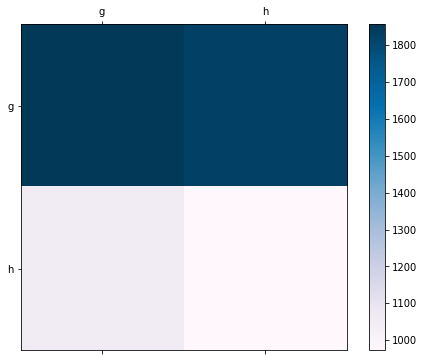

In [53]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [54]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

dc_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')*100
dc_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')*100

print("F1-Micro Average: " + str(round(dc_f1_micro, 4)))
print("F1-Macro Average: " + str(round(dc_f1_macro, 4)) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 49.5794
F1-Macro Average: 48.3423

              precision    recall  f1-score   support

           g       0.64      0.50      0.56      3684
           h       0.35      0.48      0.40      2022

    accuracy                           0.50      5706
   macro avg       0.49      0.49      0.48      5706
weighted avg       0.54      0.50      0.51      5706



Μελετώντας τον πίνακα σύγχυσης βλέπουμε ότι ο ταξινομήτης μας ανταποκρίνεται καλύτερα στην ταξινόμηση των δειγμάτων κατηγορίας g, καθώς οι TP τιμές για την κατηγορία h έχουν μικρές τιμές. Σημειώνουμε επίσης ότι η κατηγορία g χαρακτηρίζεται και από υψηλές τιμές FP, δηλαδή πολλά δείγματα ταξινομήθηκαν λάθος στη δεδομένη κατηγορία.

Παρατηρούμε ότι οι τιμές των *F1-Micro* και *F1-Macro* έχουν μικρή αριθμητική διαφορά μεταξύ τους. H *F1-Macro* είναι λίγο μικρότερη από εκείνη της *F1-Micro*, επειδή επηρεάζεται περισσότερο από τη μικρή απόδοση σε ότι αφορά την ακρίβεια και την ανάκλιση της κατηγορίας h, καθώς και από το μικρότερο πλήθος δειγμάτων της.

Σημειώνουμε επίσης ότι η κατηγορία g έχει τις υψηλότερες τιμές ακρίβειας και ανάκλισης με τον ταξινομητή να είναι σωστός στο 64% των περιπτώσεων όταν εκτιμά πως κάποιο δείγμα ανήκει στη συγκεκριμένη κατηγορία. Επίσης, από το σύνολο των δειγμάτων g, μπορεί να αγνωρίσει τα μισά από αυτά. Αν και η κατηγορία h χαρακτηρίζεται από χαμηλότερες αποδόσεις, αξίζει να παρατηρήσουμε ότι κατά την ταξινόμηση εξετάζουμε και λιγότερα δείγματα αυτής.

#### KNeighborsClassifier

Συνεχίζουμε με την εκπαίδευση ενός προεπιλεγμένου *KNeighbors* ταξινομητή.

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # default n: 5
knn.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = knn.predict(pulses_test) # predicting on test_set

target_names = knn.classes_.tolist() # fetch class names

knn_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [56]:
knn_default

78.93445495969156

Η ακρίβεια σε αυτήν την περίπτωση είναι αισθητά υψηλότερη από προηγουμένως με ποσοστό ακρίβειας 79% περίπου. Ας εξετάσουμε τις ανάλογες μετρικές απόδοσης:

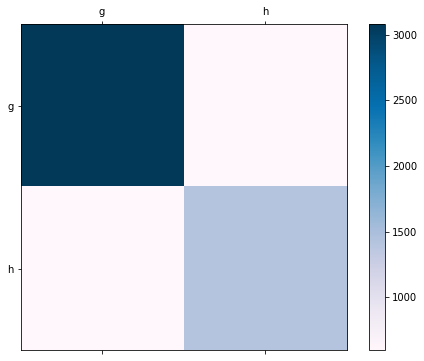

In [57]:
matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [58]:
kn_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')*100
kn_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')*100

print("F1-Micro Average: " + str(round(kn_f1_micro, 4)))
print("F1-Macro Average: " + str(round(kn_f1_macro, 4)) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 78.9345
F1-Macro Average: 77.0021

              precision    recall  f1-score   support

           g       0.84      0.84      0.84      3684
           h       0.70      0.70      0.70      2022

    accuracy                           0.79      5706
   macro avg       0.77      0.77      0.77      5706
weighted avg       0.79      0.79      0.79      5706



Ο πίνακας σύγχυσης για αυτόν τον ταξινομητή έχει πιο έντονες τιμές στις διαγωνίους του, στοιχείο που υποδεικνύει μία σχετικά καλύτερη απόδοση από προηγουμένως. Αξίζει να παρατηρήσουμε ότι λίγοτερα δείγματα της κατηγορίας h ταξινομούνται σωστά.

Και σε αυτή την περίπτωση παρατηρούμε μία μικρή διαφορά μεταξύ *F1-Micro* και *F1-Macro*. Αυτό οφείλεται και πάλι στην κατηγορία h, η οποία χαρακτηρίζεται από λιγότερα δείγματα, ενώ παρουσιάζει αισθητά χαμηλότερες τιμές ακρίβειας και ανάκλισης σε σύγκριση με την κατηγορία g. Ως αποτέλεσμα το *F1-score* είναι χαμηλότερο από εκείνο της g και κατά συνέπεια επηρεάζει αρνητικά το *Macro-Averaging*.

Όπως και στον προηγούμενο ταξινομητή παρατηρούμε ότι οι αποδόσεις για την κατηγορία g είναι οι υψηλότερες του μοντέλου. Αντίθετα ο ταξινομητής μας μπορεί να αναγνωρίσει το 70% των δειγμάτων κατηγορίας h, ενώ για κάθε αντίστοιχη εκτίμηση είναι σωστός στο 70% των περιπτώσεων.

#### GaussianNBClassifier

Ο επόμενος ταξινομητής που θα εξετάσουμε είναι ο *GaussianNaiveBayes*, o οποίος σημειώνουμε δε χαρακτηρίζεται από υπερπαραμέτρους.

In [59]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = gnb.predict(pulses_test) # predicting on test_set

target_names = gnb.classes_.tolist() # fetch class names

gnb_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [60]:
gnb_default

72.18717139852787

Η ακρίβεια για τον ταξινομητή μας ανέρχεται σε περίπου 72%.

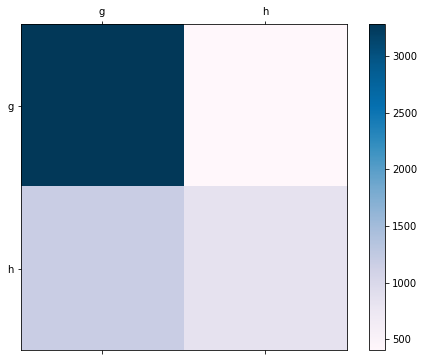

In [61]:
matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [62]:
gnb_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')*100
gnb_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')*100

print("F1-Micro Average: " + str(round(gnb_f1_micro, 4)))
print("F1-Macro Average: " + str(round(gnb_f1_macro, 4)) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 72.1872
F1-Macro Average: 65.9445

              precision    recall  f1-score   support

           g       0.73      0.89      0.81      3684
           h       0.68      0.41      0.51      2022

    accuracy                           0.72      5706
   macro avg       0.71      0.65      0.66      5706
weighted avg       0.71      0.72      0.70      5706



Από τον πίνακα σύγχυσης σημειώνουμε ότι δείγματα g ταξινομούνται σωστά στην αντίστοιχη κατηγορία, ενώ έχουμε ένα μεγάλο πλήθος FN για την κατηγορία h, στοιχείο το οποίο αποτυπώνεται και στις αντίστοιχες μετρικές *F1*.

Εδώ παρατηρούμε αισθητή διαφορά για τις τιμές των *F1-Micro* και *F1-Macro* των ταξινομητών μας. Πιο συγκεκριμένα το *F1-score* για την κατηγορία h είναι πολύ χαμηλότερο από εκείνο της g, λόγω της χαμηλής απόδοσης της κατηγορίας σε ότι αφορά την ανάκλισή της. Κατά συνέπεια το *F1-Macro-Averaging* επηρεάζεται πόλυ περισσότερο από τη χαμηλότερη αυτή τιμή και σε συνδυασμό με τα λιγότερα δείγματα της κατηγορίας, επιδρά αρνητικά στο συνολικό *F1-Macro Average*.

Αξίζει να σημειώσουμε ότι ο συγκεκριμένος ταξινομητής είναι ικανός να αναγνωρίσει το 90% των δειγμάτων g και μόλις το 40% περίπου των h, με τις αντίστοιχες τιμές ακριβείας να είναι παραπλήσιες στο 73% και 68% περίπου, αντίστοιχα.

#### MLPClassifier

Τέλος, θα εκπαιδεύσουμε έναν *MLPClassifier*.

In [20]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = mlp.predict(pulses_test) # predicting on test_set

target_names = mlp.classes_.tolist() # fetch class names

mlp_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [21]:
mlp_default

81.37048720644935

Σημειώνουμε ακρίβεια της τάξης του 81% περίπου.

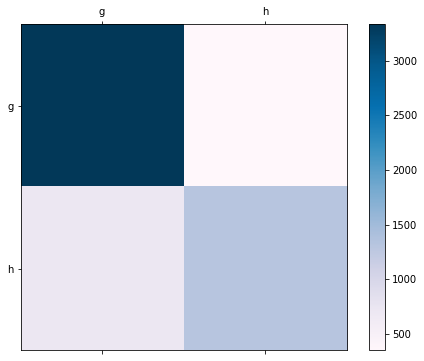

In [65]:
matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [23]:
mlp_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')*100
mlp_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')*100

print("F1-Micro Average: " + str(round(mlp_f1_micro, 4)))
print("F1-Macro Average: " + str(round(mlp_f1_macro, 4)) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 81.3705
F1-Macro Average: 79.9855

              precision    recall  f1-score   support

           g       0.87      0.84      0.85      3663
           h       0.73      0.77      0.75      2043

    accuracy                           0.81      5706
   macro avg       0.80      0.80      0.80      5706
weighted avg       0.82      0.81      0.81      5706



Ο πίνακας σύγχυσης για το συγκεκριμένο ταξινομητή δείχνει καλή ακρίβεια για τις δύο κατηγορίες, αρκετά παρόμοια με εκείνη του *KNeighborsClassifier*. Επίσης, παρατηρούμε ότι η κατηγορία h χαρακτηρίζεται από σχεδόν κοινό αριθμό TP και FN τιμών.

Οι τιμές μας για *F1-Micro* και *F1-Macro* είναι για ακόμη μία φορά παραπλήσιες. Η χαμηλότερη τιμή του *F1-Macro-Score* αποδείδεται στη χαμηλότερες τιμές ακρίβειας και ανάκλισης της κατηγορίας g, αλλά και στο μικρότερο πλήθος δειγμάτων της, στοιχεία που επιβαρύνουν το *Macro-Averaging*.

Τέλος, επιβεβαιώνουμε ότι η ταξινόμηση δειγμάτων g χαρακτηρίζεται και σε αυτόν τον ταξινομητή από υψηλότερες αποδόσεις με τιμές ακρίβειας και ανάκλισης 82% και 90%, αντίστοιχα.

Κλείνοντας το μέρος της προεπιλεγμένης εκπαίδευσης, παρουσιάζουμε παρακάτω ένα συνολικό διάγραμμα με την απόδοση του εκάστοτε ταξινομητή:

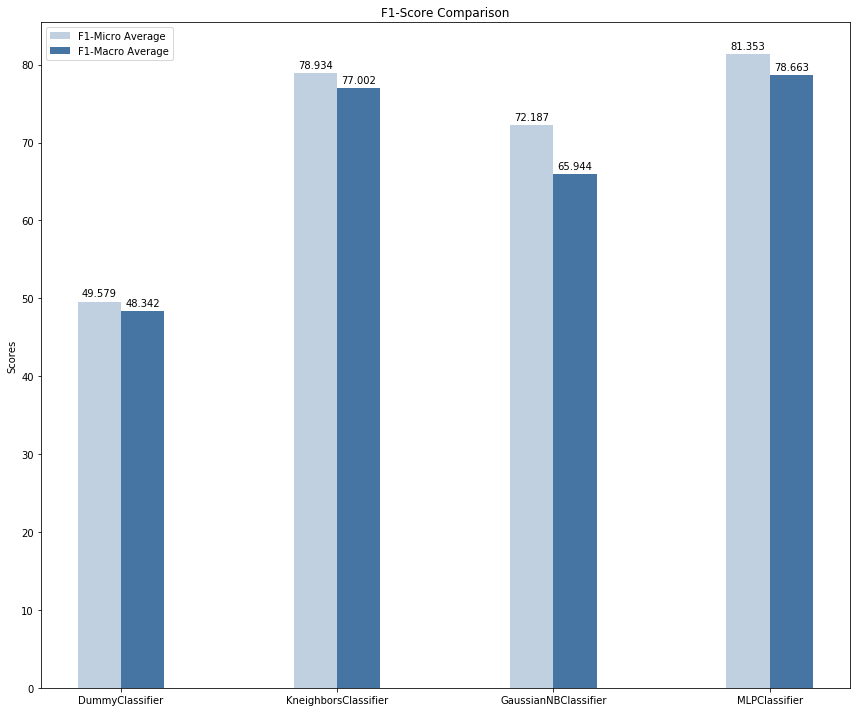

In [67]:
# Grouped BarPlot source: https://bit.ly/36y14Sw

labels = ['DummyClassifier', 'KneighborsClassifier', 'GaussianNBClassifier', 'MLPClassifier']
f1_micro = [round(dc_f1_micro, 3), round(kn_f1_micro, 3), round(gnb_f1_micro, 3), round(mlp_f1_micro, 3)]
f1_macro = [round(dc_f1_macro, 3), round(kn_f1_macro, 3), round(gnb_f1_macro, 3), round(mlp_f1_macro, 3)]

width = 0.20
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 10))
rect1 = ax.bar(x-width/2, f1_micro, width, label='F1-Micro Average', color=(0.2, 0.4, 0.6, 0.3))
rect2 = ax.bar(x+width/2, f1_macro, width, label='F1-Macro Average', color=(0.2, 0.4, 0.6, 0.9))

ax.legend()
ax.set_xticks(x)
ax.set_ylabel('Scores')
ax.set_xticklabels(labels)
ax.set_title('F1-Score Comparison')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x()+rect.get_width()/2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
fig.tight_layout()

plt.show()

Αξίζει να παρατηρήσουμε ότι σε σύγκριση με την άσκηση του μικρού dataset, παρατηρούμε μία μικρή αλλά εμφανή διαφορά μεταξύ *F1-Micro* και *F1-Macro*. Όπως γνωρίζουμε το *Macro-Averaging* δίνει μεγαλύτερο βάρος στη λιγότερη συχνή κατηγορία, από την οποία επηρεάζεται και πρισσότερο. Δεδομένου, λοιπόν, ότι έχουμε λιγότερα δείγματα κατηγορίας h τα οποία δεν παρουσιάζουν καλές επίδόσεις στους παραπάνω ταξινομητής, η συμπεριφορά των διαγραμμάτων είναι αναμενόμενη.

---

<a id='Βελτίωση'></a>

## Βελτίωση Ταξινομητών

Προκειμένου να βελτιώσουμε την απόδοση των ταξινομητών μας θα χρησιμοποιήσουμε τη συνάρτηση *GridSearchCV*, η οποία μέσω *Cross_Validation* θα ελέγξει πως ανταποκρίνονται τα μοντέλα μας για όλους τους δυνατούς συνδυασμούς υπερπαραμέτρων που θα της περάσουμε. Σχετικά με τον *GaussianNBClassifier*, ο οποίος δεν χαρακτηρίζεται από υπερπαραμέτρους, θα εξετάσουμε την απόδοσή του στο μετασχηματισμό των δεδομένων που θα ακολουθήσουμε.

In [77]:
from sklearn.model_selection import GridSearchCV

Στη *GridSearchCV* θα χρησιμοποιήσουμε δύο μετρικές αξιολόγησης: *F1-Micro* και *F1-Macro*. <font color='red'>Στο όρισμα *refit* θα περάσουμε τη μετρική *F1-Macro*, επειδή δεδομένου του μη-εξισορροπημένου συνόλου δεδομένων μας, εκείνη είναι η μετρική η οποία θέλουμε να βελτιστοποιήσουμε.</font>

Προς αυτοματοποίηση της διαδικασίας βελτιστοποίησης θα κάνουμε χρήση των *Pipelines*. Θα εξετάσουμε όλους τους δυνατούς συνδυασμούς από το ακόλουθο σχήμα:

                Επιλογή Χαρακτηριστικών - Κανονικοποίηση - Εξαγωγή Χαρακτηριστικών - Ταξινομητής
Για επιλογή χαρακτηριστικών θα χρησιμοποιήσουμε την τεχνική της *Recursive Feature Elimination (RFE)* με εκτιμητή *LogisticRegression*, ενώ για εξαγωγή χαρακτηριστικών θα στραφούμε σε *Principal Component Analysis (PCA)* και *Independent Component Analysis (ICA)*.

In [78]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.decomposition import FastICA, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Ακολουθεί πίνακας με όλες τι διαφορετικές αρχιτεκτονικές μετασχηματιστών που ακολουθήσαμε. Με πράσινο χρώμα σημειώνονται τα σχήματα εκείνα που αποδείχθηκαν αποδοτικά για κάθε έναν από τους ταξινομητές που εξετάζουμε.

[<font color='green'>1.Standardization</font>](#Standardization) 

[2.Recursive Feature Elimination](#RFE)

[<font color='green'>3.Recursive Feature Elimination - Standardization</font>](#RFE_Standardization)

[<font color='green'>4.Recursive Feature Elimination - Standardization - PCA</font>](#RFE_Standardization_PCA)

[5.Recursive Feature Elimination - Standardization - ICA](#RFE_Standardization_ICA)

[6.Standardization - PCA](#Standardization_PCA)

[7.Standardization - ICA](#Standardization_ICA)

In [224]:
# Scoring
metrics = ['f1_macro', 'f1_micro']

# Data transformers
features = [i for i in range(1,10,2)] # Recursive Feature Elimination
components = [i for i in range(1,10,2)] # Independent Component Analysis

# KNeighborsClassifier
neighbors = [i for i in range(1,30,2)]

# MLPClassifier
alpha = [0.0001, 0.05]
solver = ['lbfgs', 'sgd']
max_iter = [250, 500]
layer_size = [(100,), (250,)]
activation = ['tanh', 'relu']

Επίσης, θα χρονομετρήσουμε τη διάρκεια της κάθε διαδικάσιας.

In [117]:
import time

<a id='Standardization'></a>

### 1. Standardization

In [97]:
std_scaler = StandardScaler()

#### KNeighborsClassifier

In [106]:
start_time = time.time()

clf = KNeighborsClassifier()

pipeline = Pipeline(steps=
                [('scaler', std_scaler), ('knn', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(knn__n_neighbors=neighbors), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
knn_scaled = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [107]:
gscv.best_params_

{'knn__n_neighbors': 9}

In [130]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(kn_f1_macro, 4)))
print("Scaled: " + str(round(knn_scaled, 4)))

Training Time: 16.4367 minutes

Default: 77.0021
Scaled: 80.7756


#### GaussianNBClassifier

In [111]:
start_time = time.time()

clf = GaussianNB()

pipeline = Pipeline(steps=
                [('scaler', std_scaler), ('gnb', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
gnb_scaled = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [112]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(gnb_f1_macro, 4)))
print("Scaled: " + str(round(gnb_scaled, 4)))

Training Time: 0.0057 minutes

Default: 65.9445
Scaled: 62.5896


#### MLPClassifier

In [207]:
start_time = time.time()

clf = MLPClassifier()

pipeline = Pipeline(steps=
                [('scaler', std_scaler), ('mlp', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(mlp__alpha=alpha, mlp__solver=solver, mlp__max_iter=max_iter, mlp__hidden_layer_sizes=layer_size, 
                     mlp__activation=activation), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
mlp_scaled = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [208]:
gscv.best_params_

{'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__hidden_layer_sizes': (250,),
 'mlp__max_iter': 250,
 'mlp__solver': 'adam'}

In [209]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(mlp_f1_macro, 4)))
print("Scaled: " + str(round(mlp_scaled, 4)))

Training Time: 57.2574 minutes

Default: 78.663
Scaled: 84.6089


<a id='RFE'></a>

### 2. Recursive Feature Elimination

In [143]:
rfe_selector = RFE(estimator=LogisticRegression(), step=2)

#### KNeighborsClassifier

In [134]:
start_time = time.time()

clf = KNeighborsClassifier()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('knn', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(selector__n_features_to_select=features, knn__n_neighbors=neighbors), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
knn_selected = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [135]:
gscv.best_params_

{'knn__n_neighbors': 15, 'selector__n_features_to_select': 7}

In [136]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(kn_f1_macro, 4)))
print("Scaled: " + str(round(knn_scaled, 4)))
print("Selected: " + str(round(knn_selected, 4)))

Training Time: 7.8333 minutes

Default: 77.0021
Scaled: 80.7756
Selected: 79.5387


#### GaussianNBClassifier

In [138]:
start_time = time.time()

clf = GaussianNB()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('gnb', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(selector__n_features_to_select=features), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
gnb_selected = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [139]:
gscv.best_params_

{'selector__n_features_to_select': 4}

In [140]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(gnb_f1_macro, 4)))
print("Scaled: " + str(round(gnb_scaled, 4)))
print("Selected: " + str(round(gnb_selected, 4)))

Training Time: 0.0435 minutes

Default: 65.9445
Scaled: 62.5896
Selected: 71.3338


#### MLPClassifier

In [210]:
start_time = time.time()

clf = MLPClassifier()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('mlp', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(selector__n_features_to_select=features, mlp__alpha=alpha, mlp__solver=solver, mlp__max_iter=max_iter, mlp__hidden_layer_sizes=layer_size, 
                     mlp__activation=activation), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
mlp_selected = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [211]:
gscv.best_params_

{'mlp__activation': 'logistic',
 'mlp__alpha': 0.0001,
 'mlp__hidden_layer_sizes': (400,),
 'mlp__max_iter': 500,
 'mlp__solver': 'adam',
 'selector__n_features_to_select': 7}

In [212]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(mlp_f1_macro, 4)))
print("Scaled: " + str(round(mlp_scaled, 4)))
print("Selected: " + str(round(mlp_selected, 4)))

Training Time: 166.5472 minutes

Default: 78.663
Scaled: 84.6089
Selected: 82.5108


<a id='RFE_Standardization'></a>

### 3. Recursive Feature Elimination, Standardization

#### KNeighborsClassifier

In [146]:
start_time = time.time()

clf = KNeighborsClassifier()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler), ('knn', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(selector__n_features_to_select=features, knn__n_neighbors=neighbors), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
knn_selected_scaled = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [147]:
gscv.best_params_

{'knn__n_neighbors': 25, 'selector__n_features_to_select': 7}

In [148]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(kn_f1_macro, 4)))
print("Scaled: " + str(round(knn_scaled, 4)))
print("Selected: " + str(round(knn_selected, 4)))
print("Selected_Scaled: " + str(round(knn_selected_scaled, 4)))

Training Time: 8.1807 minutes

Default: 77.0021
Scaled: 80.7756
Selected: 79.5387
Selected_Scaled: 82.3997


#### GaussianNBClassifier

In [149]:
start_time = time.time()

clf = GaussianNB()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler), ('gnb', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(selector__n_features_to_select=features), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
gnb_selected_scaled = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [150]:
gscv.best_params_

{'selector__n_features_to_select': 4}

In [151]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(gnb_f1_macro, 4)))
print("Scaled: " + str(round(gnb_scaled, 4)))
print("Selected: " + str(round(gnb_selected, 4)))
print("Selected_Scaled: " + str(round(gnb_selected_scaled, 4)))

Training Time: 0.054 minutes

Default: 65.9445
Scaled: 62.5896
Selected: 71.3338
Selected_Scaled: 71.3338


#### MLPClassifier

In [216]:
start_time = time.time()

clf = MLPClassifier()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler), ('mlp', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(selector__n_features_to_select=features, mlp__alpha=alpha, mlp__solver=solver, mlp__max_iter=max_iter, mlp__hidden_layer_sizes=layer_size, 
                     mlp__activation=activation), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
mlp_selected_scaled = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [217]:
gscv.best_params_

{'mlp__activation': 'logistic',
 'mlp__alpha': 0.0001,
 'mlp__hidden_layer_sizes': (100,),
 'mlp__max_iter': 250,
 'mlp__solver': 'lbfgs',
 'selector__n_features_to_select': 9}

In [218]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(mlp_f1_macro, 4)))
print("Scaled: " + str(round(mlp_scaled, 4)))
print("Selected: " + str(round(mlp_selected, 4)))
print("Selected_Scaled: " + str(round(mlp_selected_scaled, 4)))

Training Time: 81.0595 minutes

Default: 78.663
Scaled: 84.6089
Selected: 82.5108
Selected_Scaled: 84.3016


<a id='RFE_Standardization_PCA'></a>

### 4. Recursive Feature Elimination, Standardization, PCA

In [154]:
pca = PCA(n_components=0.95)

#### KNeighborsClassifier

In [155]:
start_time = time.time()

clf = KNeighborsClassifier()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler), ('pca', pca), ('knn', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(selector__n_features_to_select=features, knn__n_neighbors=neighbors), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
knn_selected_scaled_pca = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [156]:
gscv.best_params_

{'knn__n_neighbors': 23, 'selector__n_features_to_select': 6}

In [157]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(kn_f1_macro, 4)))
print("Scaled: " + str(round(knn_scaled, 4)))
print("Selected: " + str(round(knn_selected, 4)))
print("Selected_Scaled: " + str(round(knn_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(knn_selected_scaled_pca, 4)))

Training Time: 7.3681 minutes

Default: 77.0021
Scaled: 80.7756
Selected: 79.5387
Selected_Scaled: 82.3997
Selected_Scaled_PCA: 79.5153


#### GaussianNBClassifier

In [158]:
start_time = time.time()

clf = GaussianNB()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler), ('pca', pca), ('gnb', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(selector__n_features_to_select=features), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
gnb_selected_scaled_pca = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [159]:
gscv.best_params_

{'selector__n_features_to_select': 5}

In [160]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(gnb_f1_macro, 4)))
print("Scaled: " + str(round(gnb_scaled, 4)))
print("Selected: " + str(round(gnb_selected, 4)))
print("Selected_Scaled: " + str(round(gnb_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(gnb_selected_scaled_pca, 4)))

Training Time: 0.0667 minutes

Default: 65.9445
Scaled: 62.5896
Selected: 71.3338
Selected_Scaled: 71.3338
Selected_Scaled_PCA: 73.1909


#### MLPClassifier

In [219]:
start_time = time.time()

clf = MLPClassifier()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler), ('pca', pca), ('mlp', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(selector__n_features_to_select=features, mlp__alpha=alpha, mlp__solver=solver, mlp__max_iter=max_iter, mlp__hidden_layer_sizes=layer_size, 
                     mlp__activation=activation), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
mlp_selected_scaled_pca = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [220]:
gscv.best_params_

{'mlp__activation': 'relu',
 'mlp__alpha': 0.05,
 'mlp__hidden_layer_sizes': (100,),
 'mlp__max_iter': 500,
 'mlp__solver': 'lbfgs',
 'selector__n_features_to_select': 7}

In [221]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(mlp_f1_macro, 4)))
print("Scaled: " + str(round(mlp_scaled, 4)))
print("Selected: " + str(round(mlp_selected, 4)))
print("Selected_Scaled: " + str(round(mlp_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(mlp_selected_scaled_pca, 4)))

Training Time: 75.3493 minutes

Default: 78.663
Scaled: 84.6089
Selected: 82.5108
Selected_Scaled: 84.3016
Selected_Scaled_PCA: 80.8614


<a id='RFE_Standardization_ICA'></a>

### 5. Recursive Feature Elimination, Standardization, ICA

In [167]:
ica = FastICA()

#### KNeighborsClassifier

In [168]:
start_time = time.time()

clf = KNeighborsClassifier()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler), ('ica', ica), ('knn', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(ica__n_components=features, selector__n_features_to_select=features, knn__n_neighbors=neighbors), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
knn_selected_scaled_ica = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [169]:
gscv.best_params_

{'ica__n_components': 7,
 'knn__n_neighbors': 9,
 'selector__n_features_to_select': 7}

In [170]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(kn_f1_macro, 4)))
print("Scaled: " + str(round(knn_scaled, 4)))
print("Selected: " + str(round(knn_selected, 4)))
print("Selected_Scaled: " + str(round(knn_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(knn_selected_scaled_pca, 4)))
print("Selected_Scaled_ICA: " + str(round(knn_selected_scaled_ica, 4)))

Training Time: 10.7211 minutes

Default: 77.0021
Scaled: 80.7756
Selected: 79.5387
Selected_Scaled: 82.3997
Selected_Scaled_PCA: 79.5153
Selected_Scaled_ICA: 82.0866


#### GaussianNBClassifier

In [171]:
start_time = time.time()

clf = GaussianNB()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler), ('ica', ica), ('gnb', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(ica__n_components=features, selector__n_features_to_select=features), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
gnb_selected_scaled_ica = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [172]:
gscv.best_params_

{'ica__n_components': 7, 'selector__n_features_to_select': 5}

In [173]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(gnb_f1_macro, 4)))
print("Scaled: " + str(round(gnb_scaled, 4)))
print("Selected: " + str(round(gnb_selected, 4)))
print("Selected_Scaled: " + str(round(gnb_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(gnb_selected_scaled_pca, 4)))
print("Selected_Scaled_ICA: " + str(round(gnb_selected_scaled_ica, 4)))

Training Time: 0.1543 minutes

Default: 65.9445
Scaled: 62.5896
Selected: 71.3338
Selected_Scaled: 71.3338
Selected_Scaled_PCA: 73.1909
Selected_Scaled_ICA: 71.9096


#### MLPClassifier

In [225]:
start_time = time.time()

clf = MLPClassifier()

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler), ('ica', ica), ('mlp', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(ica__n_components=features, selector__n_features_to_select=features, mlp__alpha=alpha, mlp__solver=solver, mlp__max_iter=max_iter, mlp__hidden_layer_sizes=layer_size, 
                     mlp__activation=activation), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
mlp_selected_scaled_ica = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [226]:
gscv.best_params_

{'ica__n_components': 9,
 'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__hidden_layer_sizes': (100,),
 'mlp__max_iter': 500,
 'mlp__solver': 'lbfgs',
 'selector__n_features_to_select': 9}

In [227]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(mlp_f1_macro, 4)))
print("Scaled: " + str(round(mlp_scaled, 4)))
print("Selected: " + str(round(mlp_selected, 4)))
print("Selected_Scaled: " + str(round(mlp_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(mlp_selected_scaled_pca, 4)))
print("Selected_Scaled_ICA: " + str(round(mlp_selected_scaled_ica, 4)))

Training Time: 92.7702 minutes

Default: 78.663
Scaled: 84.6089
Selected: 82.5108
Selected_Scaled: 84.3016
Selected_Scaled_PCA: 80.8614
Selected_Scaled_ICA: 80.9396


<a id='Standardization_PCA'></a>

### 6. Standardization, PCA

#### KNeighborsClassifier

In [187]:
start_time = time.time()

clf = KNeighborsClassifier()

pipeline = Pipeline(steps=
                [('scaler', std_scaler), ('pca', pca), ('knn', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(knn__n_neighbors=neighbors), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
knn_scaled_pca = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [188]:
gscv.best_params_

{'knn__n_neighbors': 13}

In [189]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(kn_f1_macro, 4)))
print("Scaled: " + str(round(knn_scaled, 4)))
print("Selected: " + str(round(knn_selected, 4)))
print("Selected_Scaled: " + str(round(knn_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(knn_selected_scaled_pca, 4)))
print("Selected_Scaled_ICA: " + str(round(knn_selected_scaled_ica, 4)))
print("Scaled_PCA: " + str(round(knn_scaled_pca, 4)))

Training Time: 0.56 minutes

Default: 77.0021
Scaled: 80.7756
Selected: 79.5387
Selected_Scaled: 82.3997
Selected_Scaled_PCA: 79.5153
Selected_Scaled_ICA: 82.0866
Scaled_PCA: 77.2765


#### GaussianNBClassifier

In [190]:
start_time = time.time()

clf = GaussianNB()

pipeline = Pipeline(steps=
                [('scaler', std_scaler), ('pca', pca), ('gnb', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
gnb_scaled_pca = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [191]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(gnb_f1_macro, 4)))
print("Scaled: " + str(round(gnb_scaled, 4)))
print("Selected: " + str(round(gnb_selected, 4)))
print("Selected_Scaled: " + str(round(gnb_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(gnb_selected_scaled_pca, 4)))
print("Selected_Scaled_ICA: " + str(round(gnb_selected_scaled_ica, 4)))
print("Scaled_PCA: " + str(round(gnb_scaled_pca, 4)))

Training Time: 0.01 minutes

Default: 65.9445
Scaled: 62.5896
Selected: 71.3338
Selected_Scaled: 71.3338
Selected_Scaled_PCA: 73.1909
Selected_Scaled_ICA: 71.9096
Scaled_PCA: 70.0544


#### MLPClassifier

In [228]:
start_time = time.time()

clf = MLPClassifier()

pipeline = Pipeline(steps=
                [('scaler', std_scaler), ('pca', pca), ('mlp', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(mlp__alpha=alpha, mlp__solver=solver, mlp__max_iter=max_iter, mlp__hidden_layer_sizes=layer_size, 
                     mlp__activation=activation), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
mlp_scaled_pca = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [229]:
gscv.best_params_

{'mlp__activation': 'tanh',
 'mlp__alpha': 0.0001,
 'mlp__hidden_layer_sizes': (250,),
 'mlp__max_iter': 250,
 'mlp__solver': 'lbfgs'}

In [230]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(mlp_f1_macro, 4)))
print("Scaled: " + str(round(mlp_scaled, 4)))
print("Selected: " + str(round(mlp_selected, 4)))
print("Selected_Scaled: " + str(round(mlp_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(mlp_selected_scaled_pca, 4)))
print("Selected_Scaled_ICA: " + str(round(mlp_selected_scaled_ica, 4)))
print("Scaled_PCA: " + str(round(mlp_scaled_pca, 4)))

Training Time: 13.0019 minutes

Default: 78.663
Scaled: 84.6089
Selected: 82.5108
Selected_Scaled: 84.3016
Selected_Scaled_PCA: 80.8614
Selected_Scaled_ICA: 80.9396
Scaled_PCA: 79.7393


<a id='Standardization_ICA'></a>

### 7. Standardization, ICA

#### KNeighborsClassifier

In [195]:
start_time = time.time()

clf = KNeighborsClassifier()

pipeline = Pipeline(steps=
                [('scaler', std_scaler), ('ica', ica), ('knn', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(ica__n_components=features, knn__n_neighbors=neighbors), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
knn_scaled_ica = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [196]:
gscv.best_params_

{'ica__n_components': 9, 'knn__n_neighbors': 15}

In [197]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(kn_f1_macro, 4)))
print("Scaled: " + str(round(knn_scaled, 4)))
print("Selected: " + str(round(knn_selected, 4)))
print("Selected_Scaled: " + str(round(knn_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(knn_selected_scaled_pca, 4)))
print("Selected_Scaled_ICA: " + str(round(knn_selected_scaled_ica, 4)))
print("Scaled_PCA: " + str(round(knn_scaled_pca, 4)))
print("Scaled_ICA: " + str(round(knn_scaled_ica, 4)))

Training Time: 2.7091 minutes

Default: 77.0021
Scaled: 80.7756
Selected: 79.5387
Selected_Scaled: 82.3997
Selected_Scaled_PCA: 79.5153
Selected_Scaled_ICA: 82.0866
Scaled_PCA: 77.2765
Scaled_ICA: 81.3552


#### GaussianNBClassifier

In [198]:
start_time = time.time()

clf = GaussianNB()

pipeline = Pipeline(steps=
                [('scaler', std_scaler), ('ica', ica), ('gnb', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(ica__n_components=features), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
gnb_scaled_ica = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [199]:
gscv.best_params_

{'ica__n_components': 9}

In [200]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(gnb_f1_macro, 4)))
print("Scaled: " + str(round(gnb_scaled, 4)))
print("Selected: " + str(round(gnb_selected, 4)))
print("Selected_Scaled: " + str(round(gnb_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(gnb_selected_scaled_pca, 4)))
print("Selected_Scaled_ICA: " + str(round(gnb_selected_scaled_ica, 4)))
print("Scaled_PCA: " + str(round(gnb_scaled_pca, 4)))
print("Scaled_ICA: " + str(round(gnb_scaled_ica, 4)))

Training Time: 0.0285 minutes

Default: 65.9445
Scaled: 62.5896
Selected: 71.3338
Selected_Scaled: 71.3338
Selected_Scaled_PCA: 73.1909
Selected_Scaled_ICA: 71.9096
Scaled_PCA: 70.0544
Scaled_ICA: 66.4319


#### MLPClassifier

In [231]:
start_time = time.time()

clf = MLPClassifier()

pipeline = Pipeline(steps=
                [('scaler', std_scaler), ('ica', ica), ('mlp', clf)], memory = 'temp')

gscv = GridSearchCV(pipeline,
                dict(ica__n_components=features, mlp__alpha=alpha, mlp__solver=solver, mlp__max_iter=max_iter, mlp__hidden_layer_sizes=layer_size, 
                     mlp__activation=activation), 
                cv=5, scoring=metrics, refit='f1_macro', return_train_score=True, n_jobs=-1)

gscv.fit(pulses_train, pulses_train_labels)
mlp_scaled_ica = gscv.best_score_ * 100 # fetch F1-Macro

final_time = (time.time() - start_time)/60

In [232]:
gscv.best_params_

{'ica__n_components': 9,
 'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__hidden_layer_sizes': (100,),
 'mlp__max_iter': 500,
 'mlp__solver': 'lbfgs'}

In [233]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(round(mlp_f1_macro, 4)))
print("Scaled: " + str(round(mlp_scaled, 4)))
print("Selected: " + str(round(mlp_selected, 4)))
print("Selected_Scaled: " + str(round(mlp_selected_scaled, 4)))
print("Selected_Scaled_PCA: " + str(round(mlp_selected_scaled_pca, 4)))
print("Selected_Scaled_ICA: " + str(round(mlp_selected_scaled_ica, 4)))
print("Scaled_PCA: " + str(round(mlp_scaled_pca, 4)))
print("Scaled_ICA: " + str(round(mlp_scaled_ica, 4)))

Training Time: 22.8622 minutes

Default: 78.663
Scaled: 84.6089
Selected: 82.5108
Selected_Scaled: 84.3016
Selected_Scaled_PCA: 80.8614
Selected_Scaled_ICA: 80.9396
Scaled_PCA: 79.7393
Scaled_ICA: 81.0967


---

<a id='Final'></a>

## Τελική Αρχιτεκτονική Μετασχηματιστών

Προς αναζήτηση βέλτιστων παραμέτρων για τους ταξινομητές μας και ακολουθώντας όλες τις παραπάνω αρχιτεκτονικές μετασχηματισμών καταναλώσαμε χρονική διάρκεια ίση με 9-10 ώρες. Μελετώντας τα αποτελέσματα μας μπορούμε να καταλήξουμε σε ένα βέλτιστο σχήμα για κάθε ταξινομητή διαφορετικά. Πιο συγκεκριμένα θα έχουμε:

- **KNeighbors:** Recursive Feature Elimination - Standardization

- **GaussianNB:** Recursive Feature Elimination - Standardization - PCA

- **MLP:** Standardization

Στη συνέχεια θα δημιουργήσουμε τα αντίστοιχα pipelines για τον κάθε ταξινομητή ώστε να τους αξιολογήσουμε στα δεδομένα ελέγχου.

#### KneighborsClassifier

Για τον ταξινομητή *KNeighbors* θα χρησιμοποιήσουμε **25 γείτονες** και **7 χαρακτηριστικά επιλογής** από τον RFE.

In [274]:
std_scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=25)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=7)

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler)])

pulses_train_prepared = pipeline.fit_transform(pulses_train, pulses_train_labels)
pulses_test_prepared = pipeline.transform(pulses_test)

knn.fit(pulses_train_prepared, pulses_train_labels)
knn_final_predictions = knn.predict(pulses_test_prepared)
knn_final = accuracy_score(pulses_test_labels, knn_final_predictions) * 100

target_names = knn.classes_.tolist()

In [251]:
print("Default: " + str(knn_default))
print("Optimized: " + str(knn_final))

Default: 78.93445495969156
Optimized: 85.27865404837014


Παρατηρούμε ότι βελτιώσαμε την ακρίβεια του ταξινομητή κατά περίπου 10%. Συνεχίζουμε εξετάζοντας και τις υπόλοιπες μετρικές:

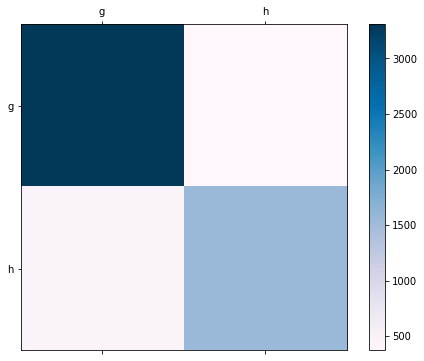

In [252]:
matrix = confusion_matrix(pulses_test_labels, knn_final_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [265]:
kn_f1_micro_final = f1_score(pulses_test_labels, knn_final_predictions, average='micro')*100
kn_f1_macro_final = f1_score(pulses_test_labels, knn_final_predictions, average='macro')*100

print("F1-Micro Average: " + str(round(kn_f1_micro_final, 4)))
print("F1-Macro Average: " + str(round(kn_f1_macro_final, 4)) + "\n")

print(classification_report(pulses_test_labels, knn_final_predictions))

F1-Micro Average: 85.2787
F1-Macro Average: 83.7463

              precision    recall  f1-score   support

           g       0.88      0.90      0.89      3684
           h       0.81      0.77      0.79      2022

    accuracy                           0.85      5706
   macro avg       0.84      0.83      0.84      5706
weighted avg       0.85      0.85      0.85      5706



Σκοπός της βελτίωσής μας ήτανε η βελτίωση του *F1-Macro*, δεδομένου ότι το σύνολο δεδομένων μας δεν ήταν ισορροπημένο. Έχουμε σημειώσει τη βελτίωση που θέλαμε κυρίως στην κατηγορία h, με ακρίβεια και ανάκλιση 81% και 77% αντίστοιχα. Τα ποσοστά για την κατηγορία g βελτιώθηκαν ακόμα περισσότερο, με το μοντέλο μας να είναι ικανό να αναγνωρίσει 9/10 δείγματα της αντίστοιχης κατηγορίας και ακρίβεια 88%. Παρατηρούμε επίσης και την έντονη διαγώνιο του πίνακα σύγχυσης και σημειώνουμε ότι το ελαφρύτερο χρώμα της κατηγορίας h οφείλεται και στο μικρότερο αριθμό δειγμάτων που τη χαρακτηρίζουν.

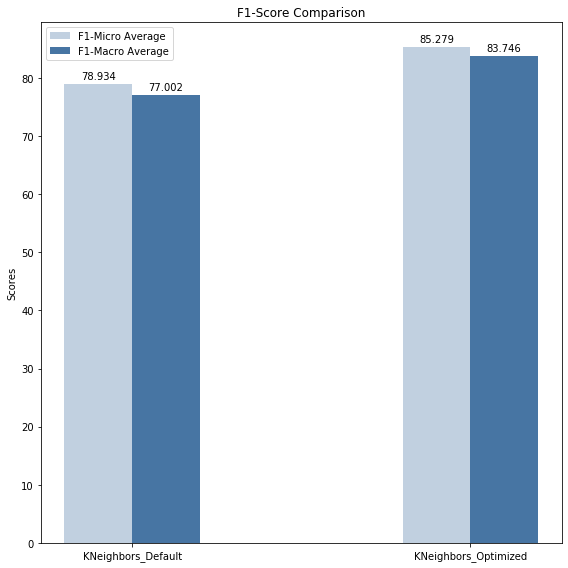

In [271]:
labels = ['KNeighbors_Default', 'KNeighbors_Optimized']
f1_micro_knn_final = [round(kn_f1_micro, 3), round(kn_f1_micro_final, 3)]
f1_macro_knn_final = [round(kn_f1_macro, 3), round(kn_f1_macro_final, 3)]

width = 0.20
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 8))
rect1 = ax.bar(x-width/2, f1_micro_knn_final, width, label='F1-Micro Average', color=(0.2, 0.4, 0.6, 0.3))
rect2 = ax.bar(x+width/2, f1_macro_knn_final, width, label='F1-Macro Average', color=(0.2, 0.4, 0.6, 0.9))

ax.legend()
ax.set_xticks(x)
ax.set_ylabel('Scores')
ax.set_xticklabels(labels)
ax.set_title('F1-Score Comparison')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x()+rect.get_width()/2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
fig.tight_layout()

plt.show()

Η διαδικασία εύρεσης βελτίστων παραμέτρων για τον *KNeighborsClassifier* διήρκησε περίπου 1 ώρα, χρόνος αναμενόμενος εάν λάβουμε υπόψην ότι εξετάσαμε διαφορετικούς γείτονες, διαφορετικά χαρακτηριστικά επιλογής και διαφορετικά χαρακτηριστικά εξαγωγής σε 7 σχήματα μετασχηματισμών. Η βελτίωση ωστόσο που πετύχαμε ως προς *F1-Macro* είναι μάλλον απογοητευτική, δεδομένου του πλήθους των αρχιτεκτονικών και των συνδυασμών που δοκιμάσαμε.

Θα εξετάσουμε και τον *DummyClassifier* για το δεδομένο σχήμα μετασχηματισμών:

In [290]:
dc = DummyClassifier()

dc.fit(pulses_train_prepared, pulses_train_labels)
dc_final_predictions_1 = dc.predict(pulses_test_prepared)
dc_final_1 = accuracy_score(pulses_test_labels, dc_final_predictions_1) * 100

In [298]:
print("Default: " + str(dummy_default))
print("1st_Schema: " + str(dc_final_1))

Default: 49.57939011566772
1st_Schema: 50.85874518051175


### GaussianNBClassifier 

Για τον *GaussianNB* θα χρησιμοποιήσουμε **7 χαρακτηριστικά επιλογής** από τον RFE.

In [292]:
gnb = GaussianNB()
pca = PCA(n_components=0.95)
std_scaler = StandardScaler()
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=5)

pipeline = Pipeline(steps=
                [('selector', rfe_selector), ('scaler', std_scaler), ('pca', pca)])

pulses_train_prepared = pipeline.fit_transform(pulses_train, pulses_train_labels)
pulses_test_prepared = pipeline.transform(pulses_test)

gnb.fit(pulses_train_prepared, pulses_train_labels)
gnb_final_predictions = gnb.predict(pulses_test_prepared)
gnb_final = accuracy_score(pulses_test_labels, gnb_final_predictions) * 100

target_names = gnb.classes_.tolist()

In [256]:
print("Default: " + str(gnb_default))
print("Optimized: " + str(gnb_final))

Default: 72.18717139852787
Optimized: 77.30459165790397


Η ακρίβεια του ταξινομητή μας ανέρχεται σε περίπου 5%.

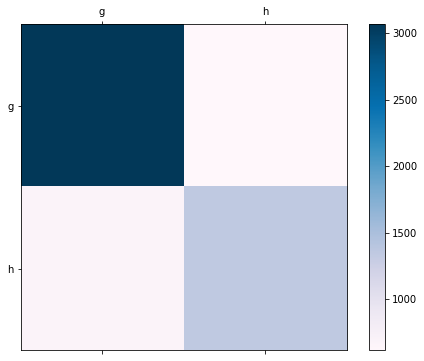

In [257]:
matrix = confusion_matrix(pulses_test_labels, gnb_final_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [258]:
gnb_f1_micro_final = f1_score(pulses_test_labels, gnb_final_predictions, average='micro')*100
gnb_f1_macro_final = f1_score(pulses_test_labels, gnb_final_predictions, average='macro')*100

print("F1-Micro Average: " + str(round(gnb_f1_micro_final, 4)))
print("F1-Macro Average: " + str(round(gnb_f1_macro_final, 4)) + "\n")

print(classification_report(pulses_test_labels, gnb_final_predictions))

F1-Micro Average: 77.3046
F1-Macro Average: 75.0334

              precision    recall  f1-score   support

           g       0.82      0.83      0.83      3684
           h       0.69      0.67      0.68      2022

    accuracy                           0.77      5706
   macro avg       0.75      0.75      0.75      5706
weighted avg       0.77      0.77      0.77      5706



Στη συγκεκριμένη περίπτωση παρατηρούμε ότι η ακρίβεια για την κατηγορία g έχει βελτιωθεί ελάχιστα, αντίθετα με την ανάκλισή της, η οποία παρουσιάζει αξιοσημείωτη βελτίωση. Αυτό αποτυπώνεται και στη μείωση του χάσματος μεταξύ *F1-Micro* και *F1-Macro*. Συνεπώς μπορεί να μην βελτιώσαμε αισθητά την απόδοση του μοντέλου, αλλά το καταστήσαμε ικανότερο να αναγνωρίζει σωματίδια κατηγορίας g και πιο συγκεκριμένα το 67% των δειγμάτων μας, από το αρχικό 41%. Συνολικά έχουμε ακρίβεια και ανάκλιση 75%.

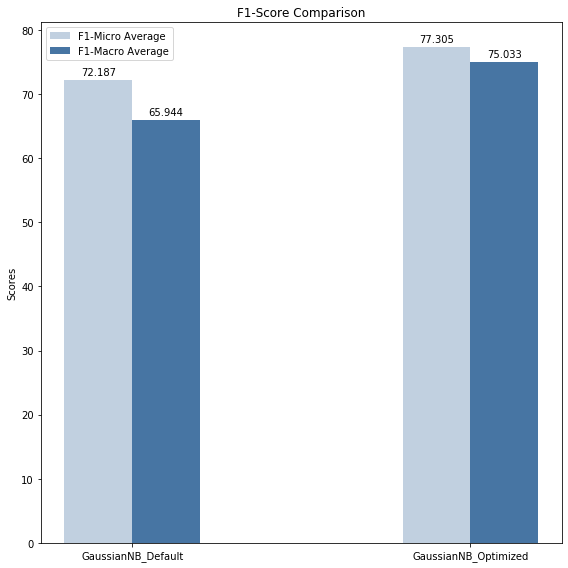

In [272]:
labels = ['GaussianNB_Default', 'GaussianNB_Optimized']
f1_micro_gnb_final = [round(gnb_f1_micro, 3), round(gnb_f1_micro_final, 3)]
f1_macro_gnb_final = [round(gnb_f1_macro, 3), round(gnb_f1_macro_final, 3)]

width = 0.20
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 8))
rect1 = ax.bar(x-width/2, f1_micro_gnb_final, width, label='F1-Micro Average', color=(0.2, 0.4, 0.6, 0.3))
rect2 = ax.bar(x+width/2, f1_macro_gnb_final, width, label='F1-Macro Average', color=(0.2, 0.4, 0.6, 0.9))

ax.legend()
ax.set_xticks(x)
ax.set_ylabel('Scores')
ax.set_xticklabels(labels)
ax.set_title('F1-Score Comparison')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x()+rect.get_width()/2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
fig.tight_layout()

plt.show()

Η διαδικασία εύρεσης κατάλληλων παραμέτρων για τον *GaussianNBClassifier* ανέρχεται σε περίπου 3 λεπτά. Ο χρόνος αυτός είναι αναμενόμενος, καθώς ο δεδομένος ταξινομητής δε χαρακτηρίζεται από υπερπαραμέτρους, μειώνοντας αισθήτα το χώρο και χρόνο αναζήτης βέλτιστων συνδυασμών. Η βελτίωση, λοιπόν της τάξης του 10% που πετύχαμε ως προς *F1-Macro* μας αφήνει ικανοποιημένους.

Θα εξετάσουμε και τον *DummyClassifier* για το δεδομένο σχήμα μετασχηματισμών:

In [293]:
dc = DummyClassifier()

dc.fit(pulses_train_prepared, pulses_train_labels)
dc_final_predictions_2 = dc.predict(pulses_test_prepared)
dc_final_2 = accuracy_score(pulses_test_labels, dc_final_predictions_2) * 100

In [299]:
print("Default: " + str(dummy_default))
print("2nd_Schema: " + str(dc_final_2))

Default: 49.57939011566772
2nd_Schema: 50.28040658955485


### MLPClassifier

Για τον *MLP* θα χρησιμοποιήσουμε **activation: relu, alpha: 0.0001, hidden_layer_size: (250,), max_iter: 250, solver: adam.** 

In [28]:
std_scaler = StandardScaler()
mlp = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(250,), max_iter=250, solver='adam')

pipeline = Pipeline(steps=
                [('scaler', std_scaler)])

pulses_train_prepared = pipeline.fit_transform(pulses_train, pulses_train_labels)
pulses_test_prepared = pipeline.transform(pulses_test)

mlp.fit(pulses_train_prepared, pulses_train_labels)
mlp_final_predictions = mlp.predict(pulses_test_prepared)
mlp_final = accuracy_score(pulses_test_labels, mlp_final_predictions) * 100

target_names = mlp.classes_.tolist()

In [29]:
print("Default: " + str(mlp_default))
print("Optimized: " + str(mlp_final))

Default: 81.37048720644935
Optimized: 86.3652295828952


Παρατηρούμε και εδώ μία βελτίωση της ακρίβεια του ταξινομητή μας της τάξης του 5%.

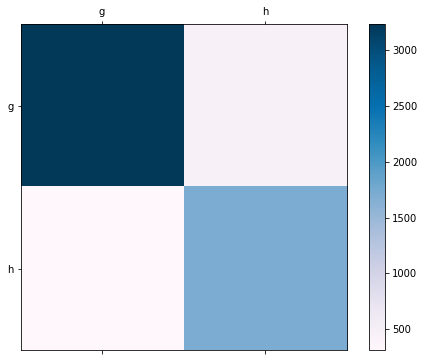

In [262]:
matrix = confusion_matrix(pulses_test_labels, mlp_final_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [30]:
mlp_f1_micro_final = f1_score(pulses_test_labels, mlp_final_predictions, average='micro')*100
mlp_f1_macro_final = f1_score(pulses_test_labels, mlp_final_predictions, average='macro')*100

print("F1-Micro Average: " + str(round(mlp_f1_micro_final, 4)))
print("F1-Macro Average: " + str(round(mlp_f1_macro_final, 4)) + "\n")

print(classification_report(pulses_test_labels, mlp_final_predictions))

F1-Micro Average: 86.3652
F1-Macro Average: 85.2111

              precision    recall  f1-score   support

           g       0.90      0.89      0.89      3663
           h       0.81      0.82      0.81      2043

    accuracy                           0.86      5706
   macro avg       0.85      0.85      0.85      5706
weighted avg       0.86      0.86      0.86      5706



Μελετώντας τις παραπάνω μετρικές καταλήγουμε πως το παρόν μοντέλο, με τους παρόντες μετασχηματισμούς είναι το αποδοτικότερο από όσα εξετάσαμε στα πλαίσια αυτού του Notebook. Ο ταξινομητής μας είναι σωστός στις προβλέψεις του με ποσοστό 85%, ενώ παράλληλα είναι ικανός να αναγνωρίσει το 85% όλων των δειγμάτων. Αξιοσημείωτες είναι και οι τιμές των *F1-Micro* και *F1-Macro*, η διαφορά των οποίων μειώθηκε με τα αντίστοιχα ποσοστά να σημειώνουν μια αύξηση της τάξης του 5-10%.

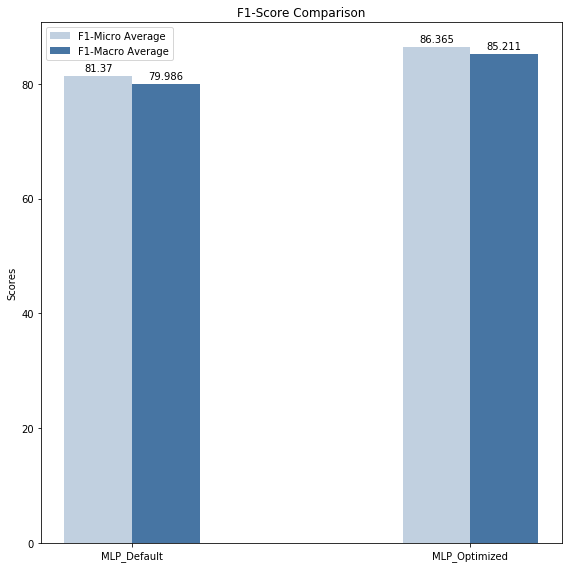

In [33]:
labels = ['MLP_Default', 'MLP_Optimized']
f1_micro_mlp_final = [round(mlp_f1_micro, 3), round(mlp_f1_micro_final, 3)]
f1_macro_mlp_final = [round(mlp_f1_macro, 3), round(mlp_f1_macro_final, 3)]

width = 0.20
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 8))
rect1 = ax.bar(x-width/2, f1_micro_mlp_final, width, label='F1-Micro Average', color=(0.2, 0.4, 0.6, 0.3))
rect2 = ax.bar(x+width/2, f1_macro_mlp_final, width, label='F1-Macro Average', color=(0.2, 0.4, 0.6, 0.9))

ax.legend()
ax.set_xticks(x)
ax.set_ylabel('Scores')
ax.set_xticklabels(labels)
ax.set_title('F1-Score Comparison')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x()+rect.get_width()/2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
fig.tight_layout()

plt.show()

Παρά την βελτίωση της τάξης του 5-10% σε ότι αφορά τα *F1-Micro* και *F1-Macro* που παρατηρούμε, αξίζει να σημειώσουμε ότι ο συνολικός χρόνος αναζήτησης βέλτιστου συνδυασμού υπερπαραμέτρων για τον *MLPClassifier* ήταν περίπου 8 ώρες. Κάτι τέτοιο είναι αναμενόμενο, εάν λάβουμε υπόψην το μεγάλο πλήθος υπερπαραμέτρων που χαρακτηρίζουν το συγκεκριμένο ταξινομητή. Σε κάθε περίπτωση, πρόκειτα για ένα μοντέλο με προοπτικές για το συγκεκριμένο σύνολο δεδομένων, δεδομένου ότι δεν συμπεριλάβαμε στο χώρο αναζήτησης όλες τις υπερπαραμέτρους του ταξινομητή, όπως για παράδειγμα *learning_rate*. Επίσης, δε συμπεριλάβαμε και όλες τις δυνατές τιμές στις υπερπαραμέτρους που τελικά εξετάσαμε, όπως για παράδειγμα *solver: adam* και *activation: logistic*.

Συνολικά το παρόν μοντέλο είναι το αποδοτικότερο από όλα εξετάσαμε στα πλαίσια της συγκεκριμένης άσκησης. Η βελτίωση της απόδοσης που πετύχαμε φαίνεται μάλλον μικρή, δεδομένου του χρόνου που χρειαστήκαμε, αλλά ικανοποιητική, δεδομένου του μεγάλου χώρου αναζήτησης.

Θα εξετάσουμε και τον *DummyClassifier* για το δεδομένο σχήμα μετασχηματισμών:

In [296]:
dc = DummyClassifier()

dc.fit(pulses_train_prepared, pulses_train_labels)
dc_final_predictions_3 = dc.predict(pulses_test_prepared)
dc_final_3 = accuracy_score(pulses_test_labels, dc_final_predictions_3) * 100

In [300]:
print("Default: " + str(dummy_default))
print("3rd_Schema: " + str(dc_final_3))

Default: 49.57939011566772
3rd_Schema: 50.59586400280407
